In [1]:
from logicqubit.logic import *
from cmath import *
import numpy as np
import sympy as sp
from scipy.optimize import *
import matplotlib.pyplot as plt

Cuda is not available!
logicqubit version 1.5.6


In [2]:
def ansatz_1q(q, theta):
    return q.RY(theta)

def ansatz_2q(q1, q2, params):
    q2.CNOT(q1)
    q1.RY(params[0])
    q2.RY(params[1])
    q1.CNOT(q2)
    q1.RY(params[0])
    q2.RY(params[1])
    q2.CNOT(q1)
    q1.RY(params[0])
    q2.RY(params[1])
           
def ansatz(reg, params):
    n_qubits = len(reg)
    depth = n_qubits
    for i in range(depth):
        for j in range(n_qubits):
            if(j < n_qubits-1):
                reg[j+1].CNOT(reg[j])
            reg[i].RY(params[j])
            
def expectation_Z(theta):
    # H = Sz
    # <psi|H|psi> = <psi| [[1,0],[0,-1]] |psi>
    # |0><0|=[[1,0],[0,0]] e |1><1|=[[0,0],[0,1]]
    # <psi|H|psi> = <psi|0><0|psi> - <psi|1><1|psi> = <0> - <1>
    
    logicQuBit  = LogicQuBit(1)
    q = Qubit()
    
    ansatz_1q(q, theta)

    res = logicQuBit.Measure([q])
    return res[0]-res[1]

/home/cleoner/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


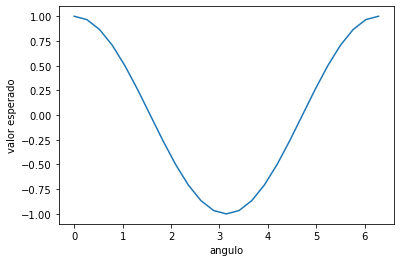

In [3]:
params = np.linspace(0.0, 2 * np.pi, 25)
data = [expectation_Z(theta) for theta in params]
 
plt.xlabel('angulo')
plt.ylabel('valor esperado')
plt.plot(params, data)
plt.show()

In [4]:
theta = 0.0
minimum = minimize(expectation_Z, theta, method='Nelder-Mead', options={'initial_simplex': np.array([[0.0], [0.05]]), 'xatol': 1.0e-2})
print(minimum)

 final_simplex: (array([[3.14375],
       [3.1375 ]]), array([-0.99999767, -0.99999163]))
           fun: -0.9999976729291358
       message: 'Optimization terminated successfully.'
          nfev: 28
           nit: 14
        status: 0
       success: True
             x: array([3.14375])


/home/cleoner/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:586: ComplexWarning: Casting complex values to real discards the imaginary part
  fsim[k] = func(sim[k])
/home/cleoner/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:611: ComplexWarning: Casting complex values to real discards the imaginary part
  fsim[-1] = fxe
/home/cleoner/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:637: ComplexWarning: Casting complex values to real discards the imaginary part
  fsim[-1] = fxcc
